In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.transforms
from scipy.stats import norm
import seaborn as sns
from pprint import pprint
from pprint import pformat
import plotly.express as px
pd.options.display.float_format = '{:.2f}'.format
from matplotlib.ticker import PercentFormatter
from scipy import stats
from scipy.stats import shapiro

In [295]:
df=pd.read_csv( - Data.csv')

#### Explore Dataset

In [296]:
df.head()

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.30,80.00,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.20,100.00,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,152,9.00,84.00,2303232,"534,858,444"
3,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,202,9.00,90.00,1129952,"57,300,000"
4,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,96,9.00,96.00,689845,"4,360,000"


In [297]:
df.tail(6)

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
994,A Hard Day's Night,1964,"Comedy, Music, Musical",Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,87,7.60,96.00,40351,"13,780,024"
995,Breakfast at Tiffany's,1961,"Comedy, Drama, Romance",Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,115,7.60,76.00,166544,NaN
996,Giant,1956,"Drama, Western",George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,201,7.60,84.00,34075,NaN
997,From Here to Eternity,1953,"Drama, Romance, War",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,118,7.60,85.00,43374,"30,500,000"
998,Lifeboat,1944,"Drama, War",Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,97,7.60,78.00,26471,NaN
999,The 39 Steps,1935,"Crime, Mystery, Thriller",Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,86,7.60,93.00,51853,NaN


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Name     1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Genre          1000 non-null   object 
 3   Director       1000 non-null   object 
 4   Star1          1000 non-null   object 
 5   Star2          1000 non-null   object 
 6   Star3          1000 non-null   object 
 7   Star4          1000 non-null   object 
 8   Runtime (min)  1000 non-null   int64  
 9   IMDB_Rating    1000 non-null   float64
 10  Meta_score     843 non-null    float64
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          831 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


In [299]:
df.describe()

,Released_Year,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes
count,1000.00,1000.00,1000.00,843.00,1000.00
mean,1991.22,122.89,7.95,77.97,273692.91
std,23.29,28.09,0.28,12.38,327372.70
min,1920.00,45.00,7.60,28.00,25088.00
25%,1976.00,103.00,7.70,70.00,55526.25
50%,1999.00,119.00,7.90,79.00,138548.50
75%,2009.00,137.00,8.10,87.00,374161.25
max,2020.00,321.00,9.30,100.00,2343110.00


In [300]:
df.isnull().sum()

Movie_Name         0
Released_Year      0
Genre              0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
Runtime (min)      0
IMDB_Rating        0
Meta_score       157
No_of_Votes        0
Gross            169
dtype: int64

In [301]:
df.nunique()

Movie_Name       999
Released_Year     99
Genre            202
Director         548
Star1            660
Star2            841
Star3            891
Star4            939
Runtime (min)    140
IMDB_Rating       17
Meta_score        63
No_of_Votes      999
Gross            823
dtype: int64

In [302]:
df[['Meta_score']] = df[['Meta_score']].fillna(value=0)
df                       

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.30,80.00,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.20,100.00,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,152,9.00,84.00,2303232,"534,858,444"
3,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,202,9.00,90.00,1129952,"57,300,000"
4,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,96,9.00,96.00,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,"Comedy, Drama, Romance",Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,115,7.60,76.00,166544,NaN
996,Giant,1956,"Drama, Western",George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,201,7.60,84.00,34075,NaN
997,From Here to Eternity,1953,"Drama, Romance, War",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,118,7.60,85.00,43374,"30,500,000"
998,Lifeboat,1944,"Drama, War",Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,97,7.60,78.00,26471,NaN


In [303]:
df.isnull().sum()

Movie_Name         0
Released_Year      0
Genre              0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
Runtime (min)      0
IMDB_Rating        0
Meta_score         0
No_of_Votes        0
Gross            169
dtype: int64

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Name     1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Genre          1000 non-null   object 
 3   Director       1000 non-null   object 
 4   Star1          1000 non-null   object 
 5   Star2          1000 non-null   object 
 6   Star3          1000 non-null   object 
 7   Star4          1000 non-null   object 
 8   Runtime (min)  1000 non-null   int64  
 9   IMDB_Rating    1000 non-null   float64
 10  Meta_score     1000 non-null   float64
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          831 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


In [305]:
df.isnull().sum()

Movie_Name         0
Released_Year      0
Genre              0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
Runtime (min)      0
IMDB_Rating        0
Meta_score         0
No_of_Votes        0
Gross            169
dtype: int64

In [306]:
df['Meta_score'].describe()

count   1000.00
mean      65.73
std       30.57
min        0.00
25%       63.00
50%       76.00
75%       85.25
max      100.00
Name: Meta_score, dtype: float64

In [307]:
#plt.figure(figsize=(25,15))
#sns.countplot(x='Meta_score',palette =['#f5c518', '#121212','#8b8b8b'], data = df)

In [308]:
df['IMDB_Rating'].describe()

count   1000.00
mean       7.95
std        0.28
min        7.60
25%        7.70
50%        7.90
75%        8.10
max        9.30
Name: IMDB_Rating, dtype: float64

In [309]:
df.tail(3)

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
997,From Here to Eternity,1953,"Drama, Romance, War",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,118,7.60,85.00,43374,"30,500,000"
998,Lifeboat,1944,"Drama, War",Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,97,7.60,78.00,26471,NaN
999,The 39 Steps,1935,"Crime, Mystery, Thriller",Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,86,7.60,93.00,51853,NaN


### Histograms  - Check distribution


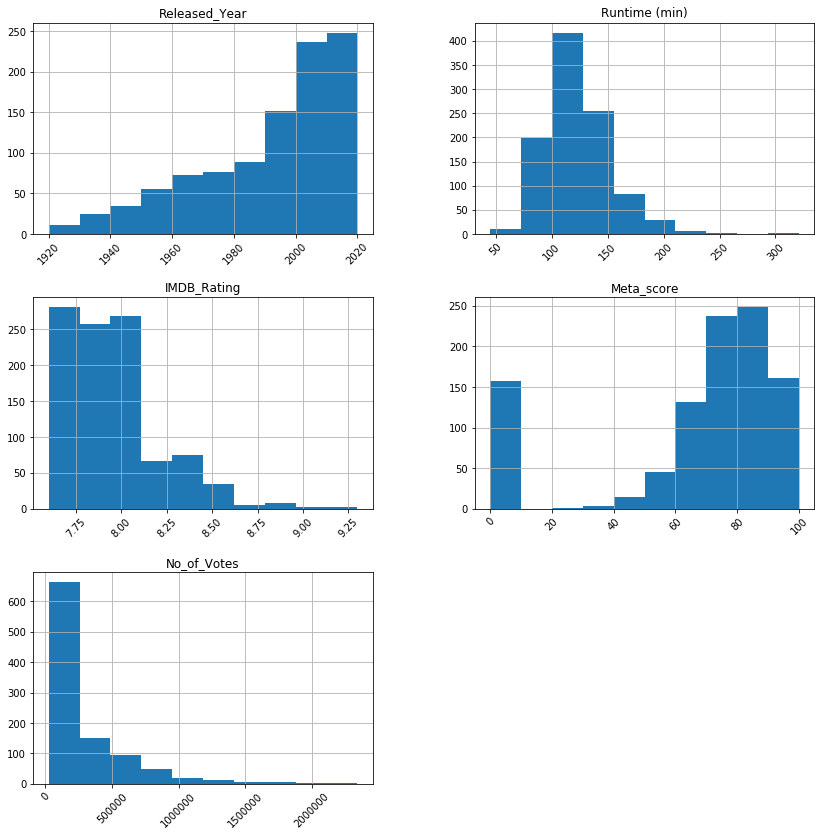

In [310]:
df.hist(figsize=(14,14), xrot=45)
plt.show()


#### Check variable "IMDB_Rating"

In [311]:
data=df.loc[:,"IMDB_Rating"]
data = np.array(data)
d_mu = np.mean(data)
d_sig = np.std(data)
data = np.random.normal(d_mu,d_sig, 1000)
stat, p = shapiro(data)
print('statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('its Gaussian ')
else:
    print('not Gaussian')

statistics=0.998, p=0.162
its Gaussian 


##### Check variable "Meta_score"

In [312]:
data=df.loc[:,"Meta_score"]
data = np.array(data)
d_mu = np.mean(data)
d_sig = np.std(data)
data = np.random.normal(d_mu,d_sig, 1000)
stat, p = shapiro(data)
print('statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('its Gaussian ')
else:
    print('not Gaussian')

statistics=0.999, p=0.949
its Gaussian 


#### Check variable "No_of_Votes"

In [313]:
data=df.loc[:,"No_of_Votes"]
data = np.array(data)
d_mu = np.mean(data)
d_sig = np.std(data)
data = np.random.normal(d_mu,d_sig, 1000)
stat, p = shapiro(data)
print('statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('its Gaussian ')
else:
    print('not Gaussian')

statistics=0.998, p=0.197
its Gaussian 


# 1. Which Genre is the most popular - 10 popular

In [314]:
df_sort=df[["Genre","IMDB_Rating","Meta_score"]]
df_sort_rating_=df_sort.sort_values("IMDB_Rating", axis = 0,ascending=False).head(10)


### most  10 popular by IMDB_Rating

In [315]:
 df_sort_rating_

,Genre,IMDB_Rating,Meta_score
0,Drama,9.30,80.00
1,"Crime, Drama",9.20,100.00
2,"Action, Crime, Drama",9.00,84.00
3,"Crime, Drama",9.00,90.00
4,"Crime, Drama",9.00,96.00
5,"Action, Adventure, Drama",8.90,94.00
6,"Crime, Drama",8.90,94.00
7,"Biography, Drama, History",8.90,94.00
10,"Action, Adventure, Drama",8.80,92.00
11,"Drama, Romance",8.80,82.00


In [316]:
 df_sort_Meta_score=df_sort.sort_values("Meta_score", axis = 0,ascending=False).reset_index().head(10)
    
    

### most 10 popular by Meta_Score

In [317]:
df_sort_Meta_score

,index,Genre,IMDB_Rating,Meta_score
0,491,Drama,7.90,100.00
1,116,"Adventure, Biography, Drama",8.30,100.00
2,81,"Mystery, Thriller",8.40,100.00
3,274,Drama,8.10,100.00
4,440,"Drama, Film-Noir",8.00,100.00
5,423,Drama,8.00,100.00
6,260,"Drama, Mystery, Romance",8.10,100.00
7,1,"Crime, Drama",9.20,100.00
8,559,"Drama, Film-Noir, Romance",7.90,100.00
9,50,"Drama, Romance, War",8.50,100.00


#### conclusion: The most popular genre is  Drama

## 2. Which are the top 5 directors? Please create KPIs to define top director (assume equal % of cost/profit) - present the calculation
 

In [318]:
df.head(10)

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.30,80.00,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.20,100.00,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,152,9.00,84.00,2303232,"534,858,444"
3,The Godfather: Part II,1974,"Crime, Drama",Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,202,9.00,90.00,1129952,"57,300,000"
4,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,96,9.00,96.00,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,201,8.90,94.00,1642758,"377,845,905"
6,Pulp Fiction,1994,"Crime, Drama",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,154,8.90,94.00,1826188,"107,928,762"
7,Schindler's List,1993,"Biography, Drama, History",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,195,8.90,94.00,1213505,"96,898,818"
8,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,148,8.80,74.00,2067042,"292,576,195"
9,Fight Club,1999,Drama,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,139,8.80,66.00,1854740,"37,030,102"


In [319]:
_dir=df[(df['Director'] =='Frank Darabont')]

In [320]:
_dir

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.30,80.00,2343110,"28,341,469"
25,The Green Mile,1999,"Crime, Drama, Fantasy",Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,189,8.60,61.00,1147794,"136,801,374"


In [321]:
IMDB_Rating_mean=sum(_dir['IMDB_Rating'])/len(_dir)

In [322]:
IMDB_Rating_mean

8.95

In [323]:
dir_=df[(df['Director'] =='Aaron Sorkin')]

In [324]:
dir_

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
612,The Trial of the Chicago 7,2020,"Drama, History, Thriller",Aaron Sorkin,Eddie Redmayne,Alex Sharp,Sacha Baron Cohen,Jeremy Strong,129,7.80,77.00,89896,NaN


In [325]:
IMDB_Rating_mean_=sum(dir_['IMDB_Rating'])/len(dir_)

In [326]:
IMDB_Rating_mean_

7.8

### IMDB_Rating KPI - AVG 



In [327]:
for level in df.loc[:,"Director"].unique():
    pprint(level)

'Frank Darabont'
'Francis Ford Coppola'
'Christopher Nolan'
'Sidney Lumet'
'Peter Jackson'
'Quentin Tarantino'
'Steven Spielberg'
'David Fincher'
'Robert Zemeckis'
'Sergio Leone'
'Lana Wachowski'
'Martin Scorsese'
'Irvin Kershner'
'Milos Forman'
'Thomas Kail'
'Bong Joon Ho'
'Sudha Kongara'
'Fernando Meirelles'
'Hayao Miyazaki'
'Roberto Benigni'
'Jonathan Demme'
'George Lucas'
'Masaki Kobayashi'
'Akira Kurosawa'
'Frank Capra'
'Todd Phillips'
'Damien Chazelle'
'Olivier Nakache'
'Roman Polanski'
'Ridley Scott'
'Tony Kaye'
'Bryan Singer'
'Luc Besson'
'Roger Allers'
'James Cameron'
'Giuseppe Tornatore'
'Isao Takahata'
'Alfred Hitchcock'
'Michael Curtiz'
'Charles Chaplin'
'Nadine Labaki'
'Can Ulkay'
'Gayatri'
'Makoto Shinkai'
'Nitesh Tiwari'
'Bob Persichetti'
'Anthony Russo'
'Lee Unkrich'
'Rajkumar Hirani'
'Aamir Khan'
'Andrew Stanton'
'Florian Henckel von Donnersmarck'
'Chan-wook Park'
'Stanley Kubrick'
'Hrishikesh Mukherjee'
'Billy Wilder'
'Sam Mendes'
'Rahi Anil Barve'
'Sriram Raghavan'
'

In [328]:
dir_list=df.loc[:,"Director"].unique()
for dir in dir_list:
    subset_by_dir = df[df['Director'] == dir]
    pprint(subset_by_dir)

                  Movie_Name  Released_Year                  Genre  \
0   The Shawshank Redemption           1994                  Drama   
25            The Green Mile           1999  Crime, Drama, Fantasy   

          Director        Star1                  Star2        Star3  \
0   Frank Darabont  Tim Robbins         Morgan Freeman   Bob Gunton   
25  Frank Darabont    Tom Hanks  Michael Clarke Duncan  David Morse   

             Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes  \
0   William Sadler            142         9.30       80.00      2343110   
25     Bonnie Hunt            189         8.60       61.00      1147794   

          Gross  
0    28,341,469  
25  136,801,374  
                  Movie_Name  Released_Year                     Genre  \
1              The Godfather           1972              Crime, Drama   
3     The Godfather: Part II           1974              Crime, Drama   
74            Apocalypse Now           1979       Drama, Mystery, War   
693

                     Movie_Name  Released_Year                      Genre  \
41           The Usual Suspects           1995   Crime, Mystery, Thriller   
342           Bohemian Rhapsody           2018    Biography, Drama, Music   
479  X-Men: Days of Future Past           2014  Action, Adventure, Sci-Fi   

         Director            Star1          Star2             Star3  \
41   Bryan Singer     Kevin Spacey  Gabriel Byrne  Chazz Palminteri   
342  Bryan Singer       Rami Malek   Lucy Boynton        Gwilym Lee   
479  Bryan Singer  Patrick Stewart   Ian McKellen      Hugh Jackman   

               Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes  \
41   Stephen Baldwin            106         8.50       77.00       991208   
342        Ben Hardy            134         8.00       49.00       450349   
479     James McAvoy            132         7.90       75.00       659763   

           Gross  
41    23,341,568  
342  216,428,042  
479  233,921,534  
            Movie_Nam

54            125         8.40        0.00        34112   NaN  
      Movie_Name  Released_Year                 Genre Director    Star1  \
55  Vikram Vedha           2017  Action, Crime, Drama  Gayatri  Pushkar   

       Star2             Star3             Star4  Runtime (min)  IMDB_Rating  \
55  Madhavan  Vijay Sethupathi  Shraddha Srinath            147         8.40   

    Meta_score  No_of_Votes Gross  
55        0.00        28401   NaN  
        Movie_Name  Released_Year                      Genre        Director  \
56  Kimi no na wa.           2016  Animation, Drama, Fantasy  Makoto Shinkai   

                Star1               Star2        Star3      Star4  \
56  Ry√ªnosuke Kamiki  Mone Kamishiraishi  Ry√¥ Narita  Aoi Y√ªki   

    Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes      Gross  
56            106         8.40       79.00       194838  5,017,246  
     Movie_Name  Released_Year                     Genre       Director  \
57       Dangal           2016  Action,

870         NaN  
            Movie_Name  Released_Year                        Genre  \
84                1917           2019         Drama, Thriller, War   
98     American Beauty           1999                        Drama   
751            Skyfall           2012  Action, Adventure, Thriller   
791  Road to Perdition           2002       Crime, Drama, Thriller   

       Director                 Star1           Star2          Star3  \
84   Sam Mendes  Dean-Charles Chapman   George MacKay    Daniel Mays   
98   Sam Mendes          Kevin Spacey  Annette Bening    Thora Birch   
751  Sam Mendes          Daniel Craig   Javier Bardem  Naomie Harris   
791  Sam Mendes             Tom Hanks  Tyler Hoechlin      Rob Maxey   

           Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes  \
84   Colin Firth            119         8.30       78.00       425844   
98   Wes Bentley            122         8.30       84.00      1069738   
751   Judi Dench            143         7.70       

              Movie_Name  Released_Year                     Genre  \
120  Singin' in the Rain           1952  Comedy, Musical, Romance   
547              Charade           1963  Comedy, Mystery, Romance   

          Director       Star1           Star2            Star3  \
120  Stanley Donen  Gene Kelly      Gene Kelly  Donald O'Connor   
547  Stanley Donen  Cary Grant  Audrey Hepburn   Walter Matthau   

               Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes  \
120  Debbie Reynolds            103         8.30       99.00       218957   
547     James Coburn            113         7.90       83.00        68689   

          Gross  
120   8,819,028  
547  13,474,588  
              Movie_Name  Released_Year  Genre          Director  \
122  Ladri di biciclette           1948  Drama  Vittorio De Sica   

                   Star1         Star2            Star3          Star4  \
122  Lamberto Maggiorani  Enzo Staiola  Lianella Carell  Elena Altieri   

     Runtime (min)

                            Movie_Name  Released_Year  \
156             Swades: We, the People           2004   
247  Lagaan: Once Upon a Time in India           2001   

                         Genre            Director           Star1  \
156                      Drama  Ashutosh Gowariker  Shah Rukh Khan   
247  Adventure, Drama, Musical  Ashutosh Gowariker      Aamir Khan   

              Star2           Star3           Star4  Runtime (min)  \
156   Gayatri Joshi  Kishori Ballal      Smit Sheth            210   
247  Raghuvir Yadav     Gracy Singh  Rachel Shelley            224   

     IMDB_Rating  Meta_score  No_of_Votes      Gross  
156         8.20        0.00        83005  1,223,240  
247         8.10       84.00       105036     70,147  
         Movie_Name  Released_Year                      Genre  \
157   Der Untergang           2004  Biography, Drama, History   
792  Das Experiment           2001            Drama, Thriller   

                Director             Star1   

    Movie_Name  Released_Year  Genre      Director        Star1  \
200      Mommy           2014  Drama  Xavier Dolan  Anne Dorval   

                     Star2             Star3          Star4  Runtime (min)  \
200  Antoine Olivier Pilon  Suzanne Cl√©ment  Patrick Huard            139   

     IMDB_Rating  Meta_score  No_of_Votes      Gross  
200         8.10       74.00        50700  3,492,754  
    Movie_Name  Released_Year                 Genre         Director  \
201     Haider           2014  Action, Crime, Drama  Vishal Bhardwaj   

             Star1 Star2            Star3          Star4  Runtime (min)  \
201  Shahid Kapoor  Tabu  Shraddha Kapoor  Kay Kay Menon            160   

     IMDB_Rating  Meta_score  No_of_Votes    Gross  
201         8.10        0.00        50445  901,610  
         Movie_Name  Released_Year                     Genre       Director  \
202           Logan           2017     Action, Drama, Sci-Fi  James Mangold   
217  Ford v Ferrari           2019  Ac

                                       Movie_Name  Released_Year  \
226  Harry Potter and the Deathly Hallows: Part 2           2011   
755  Harry Potter and the Deathly Hallows: Part 1           2010   
927        Harry Potter and the Half-Blood Prince           2009   

                          Genre     Director             Star1        Star2  \
226   Adventure, Drama, Fantasy  David Yates  Daniel Radcliffe  Emma Watson   
755  Adventure, Family, Fantasy  David Yates  Daniel Radcliffe  Emma Watson   
927   Action, Adventure, Family  David Yates  Daniel Radcliffe  Emma Watson   

            Star3           Star4  Runtime (min)  IMDB_Rating  Meta_score  \
226  Rupert Grint  Michael Gambon            130         8.10       85.00   
755  Rupert Grint      Bill Nighy            146         7.70       65.00   
927  Rupert Grint  Michael Gambon            153         7.60       78.00   

     No_of_Votes        Gross  
226       764493  381,011,219  
755       479120  295,983,305  
927  

                      Movie_Name  Released_Year           Genre  \
258  Dilwale Dulhania Le Jayenge           1995  Drama, Romance   

          Director           Star1  Star2        Star3         Star4  \
258  Aditya Chopra  Shah Rukh Khan  Kajol  Amrish Puri  Farida Jalal   

     Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes Gross  
258            189         8.10        0.00        63516   NaN  
                      Movie_Name  Released_Year                    Genre  \
260        Trois couleurs: Rouge           1994  Drama, Mystery, Romance   
521         Trois couleurs: Bleu           1993    Drama, Music, Mystery   
668  La double vie de V√©ronique           1991    Drama, Fantasy, Music   
967        Trois couleurs: Blanc           1994   Comedy, Drama, Romance   

                 Director                 Star1                   Star2  \
260  Krzysztof Kieslowski          Ir√®ne Jacob  Jean-Louis Trintignant   
521  Krzysztof Kieslowski      Juliette Binoche    Zbigniew

288         8.10       92.00       161984  16,217,773  
                 Movie_Name  Released_Year       Genre          Director  \
291  La battaglia di Algeri           1966  Drama, War  Gillo Pontecorvo   

              Star1        Star2        Star3          Star4  Runtime (min)  \
291  Brahim Hadjadj  Jean Martin  Yacef Saadi  Samia Kerbash            121   

     IMDB_Rating  Meta_score  No_of_Votes   Gross  
291         8.10       96.00        53089  55,908  
                              Movie_Name  Released_Year           Genre  \
292               El √°ngel exterminador           1962  Drama, Fantasy   
539  Le charme discret de la bourgeoisie           1972          Comedy   
857                        Belle de jour           1967  Drama, Romance   

         Director              Star1              Star2           Star3  \
292  Luis Bu√±uel       Silvia Pinal  Jacqueline Andere  Enrique Rambal   
539  Luis Bu√±uel       Fernando Rey    Delphine Seyrig   Paul Frankeur   
85

    Movie_Name  Released_Year                         Genre      Director  \
330   Zootopia           2016  Animation, Adventure, Comedy  Byron Howard   

          Star1       Star2             Star3          Star4  Runtime (min)  \
330  Rich Moore  Jared Bush  Ginnifer Goodwin  Jason Bateman            108   

     IMDB_Rating  Meta_score  No_of_Votes        Gross  
330         8.00       78.00       434143  341,268,248  
                          Movie_Name  Released_Year           Genre  \
333                           Wonder           2017   Drama, Family   
344  The Perks of Being a Wallflower           2012  Drama, Romance   

            Director           Star1        Star2            Star3  \
333  Stephen Chbosky  Jacob Tremblay  Owen Wilson  Izabela Vidovic   
344  Stephen Chbosky    Logan Lerman  Emma Watson      Ezra Miller   

             Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes  \
333  Julia Roberts            113         8.00       66.00       141923 

891            118         7.60       80.00       250057  608,581,744  
        Movie_Name  Released_Year                        Genre  \
368  Casino Royale           2006  Action, Adventure, Thriller   

            Director         Star1      Star2       Star3           Star4  \
368  Martin Campbell  Daniel Craig  Eva Green  Judi Dench  Jeffrey Wright   

     Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes        Gross  
368            144         8.00       80.00       582239  167,445,960  
         Movie_Name  Released_Year         Genre            Director  \
370  Vozvrashchenie           2003         Drama  Andrey Zvyagintsev   
880        Nelyubov           2017         Drama  Andrey Zvyagintsev   
895        Leviafan           2014  Crime, Drama  Andrey Zvyagintsev   

                   Star1             Star2                  Star3  \
370       Vladimir Garin  Ivan Dobronravov  Konstantin Lavronenko   
880       Maryana Spivak     Aleksey Rozin         Matvey Novikov   


           Movie_Name  Released_Year                   Genre   Director  \
413       Being There           1979           Comedy, Drama  Hal Ashby   
541  Harold and Maude           1971  Comedy, Drama, Romance  Hal Ashby   

             Star1             Star2           Star3         Star4  \
413  Peter Sellers  Shirley MacLaine  Melvyn Douglas   Jack Warden   
541    Ruth Gordon          Bud Cort  Vivian Pickles  Cyril Cusack   

     Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes       Gross  
413            130         8.00       83.00        65625  30,177,511  
541             91         7.90       62.00        70826         NaN  
                   Movie_Name  Released_Year                     Genre  \
414                Annie Hall           1977           Comedy, Romance   
526   Crimes and Misdemeanors           1989             Comedy, Drama   
528    Hannah and Her Sisters           1986             Comedy, Drama   
533                 Manhattan           1979    Comedy

                Movie_Name  Released_Year  Genre        Director  \
439  Cat on a Hot Tin Roof           1958  Drama  Richard Brooks   

                Star1        Star2      Star3        Star4  Runtime (min)  \
439  Elizabeth Taylor  Paul Newman  Burl Ives  Jack Carson            108   

     IMDB_Rating  Meta_score  No_of_Votes       Gross  
439         8.00       84.00        45062  17,570,324  
                 Movie_Name  Released_Year             Genre  \
440  Sweet Smell of Success           1957  Drama, Film-Noir   
869         The Ladykillers           1955     Comedy, Crime   

                  Director           Star1          Star2           Star3  \
440  Alexander Mackendrick  Burt Lancaster    Tony Curtis  Susan Harrison   
869  Alexander Mackendrick   Alec Guinness  Peter Sellers    Cecil Parker   

             Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes Gross  
440  Martin Milner             96         8.00      100.00        28137   NaN  
869    Herb

                  Movie_Name  Released_Year                      Genre  \
536  All the President's Men           1976  Biography, Drama, History   

           Director           Star1           Star2        Star3  \
536  Alan J. Pakula  Dustin Hoffman  Robert Redford  Jack Warden   

             Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes  \
536  Martin Balsam            138         7.90       84.00       103031   

          Gross  
536  70,600,000  
              Movie_Name  Released_Year                      Genre  \
537  La monta√±a sagrada           1973  Adventure, Drama, Fantasy   

                 Director                 Star1            Star2  \
537  Alejandro Jodorowsky  Alejandro Jodorowsky  Horacio Salinas   

               Star3         Star4  Runtime (min)  IMDB_Rating  Meta_score  \
537  Zamira Saunders  Juan Ferrara            114         7.90       76.00   

     No_of_Votes   Gross  
537        37183  61,001  
         Movie_Name  Released_Year    

         Movie_Name  Released_Year                      Genre        Director  \
575  Hidden Figures           2016  Biography, Drama, History  Theodore Melfi   

                Star1            Star2           Star3          Star4  \
575  Taraji P. Henson  Octavia Spencer  Janelle Mon√°e  Kevin Costner   

     Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes        Gross  
575            127         7.80       74.00       200876  169,607,287  
       Movie_Name  Released_Year                      Genre   Director  \
576  Paddington 2           2017  Adventure, Comedy, Family  Paul King   

           Star1       Star2            Star3          Star4  Runtime (min)  \
576  Ben Whishaw  Hugh Grant  Hugh Bonneville  Sally Hawkins            103   

     IMDB_Rating  Meta_score  No_of_Votes       Gross  
576         7.80       88.00        61594  40,442,052  
      Movie_Name  Released_Year                 Genre          Director  \
577  Udta Punjab           2016  Action, Crime, Dra

              Movie_Name  Released_Year                    Genre  Director  \
666     Lat sau san taam           1992  Action, Crime, Thriller  John Woo   
674  Dip huet seung hung           1989     Action, Crime, Drama  John Woo   

            Star1                Star2      Star3        Star4  Runtime (min)  \
666  Yun-Fat Chow  Tony Chiu-Wai Leung  Teresa Mo  Philip Chan            128   
674  Yun-Fat Chow            Danny Lee  Sally Yeh     Kong Chu            111   

     IMDB_Rating  Meta_score  No_of_Votes Gross  
666         7.80        0.00        46700   NaN  
674         7.80       82.00        45624   NaN  
         Movie_Name  Released_Year                      Genre      Director  \
667  Night on Earth           1991              Comedy, Drama  Jim Jarmusch   
680     Down by Law           1986       Comedy, Crime, Drama  Jim Jarmusch   
964        Dead Man           1995  Adventure, Drama, Fantasy  Jim Jarmusch   

            Star1          Star2            Star3     

699       79.00       101124  44,785,053  
          Movie_Name  Released_Year     Genre       Director           Star1  \
700  Wait Until Dark           1967  Thriller  Terence Young  Audrey Hepburn   

          Star2           Star3                Star4  Runtime (min)  \
700  Alan Arkin  Richard Crenna  Efrem Zimbalist Jr.            108   

     IMDB_Rating  Meta_score  No_of_Votes       Gross  
700         7.80       81.00        27733  17,550,741  
           Movie_Name  Released_Year                     Genre     Director  \
702  Bonnie and Clyde           1967  Action, Biography, Crime  Arthur Penn   

             Star1         Star2               Star3         Star4  \
702  Warren Beatty  Faye Dunaway  Michael J. Pollard  Gene Hackman   

     Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes Gross  
702            111         7.80       86.00       102415   NaN  
       Movie_Name  Released_Year                    Genre          Director  \
704  Mary Poppins           1964

       Movie_Name  Released_Year         Genre        Director       Star1  \
793  Billy Elliot           2000  Drama, Music  Stephen Daldry  Jamie Bell   

             Star2         Star3         Star4  Runtime (min)  IMDB_Rating  \
793  Julie Walters  Jean Heywood  Jamie Draven            110         7.70   

     Meta_score  No_of_Votes       Gross  
793       74.00       126770  21,995,263  
                    Movie_Name  Released_Year                 Genre  \
794  Hedwig and the Angry Inch           2001  Comedy, Drama, Music   

                  Director                  Star1        Star2          Star3  \
794  John Cameron Mitchell  John Cameron Mitchell  Miriam Shor  Stephen Trask   

                  Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes  \
794  Theodore Liscinski             95         7.70       85.00        31957   

         Gross  
794  3,029,081  
         Movie_Name  Released_Year            Genre           Director  \
795  Ocean's Eleven      

             Movie_Name  Released_Year                  Genre  \
833   Der Name der Rose           1986  Crime, Drama, Mystery   
950  Enemy at the Gates           2001    Drama, History, War   

                Director         Star1             Star2              Star3  \
833  Jean-Jacques Annaud  Sean Connery  Christian Slater  Helmut Qualtinger   
950  Jean-Jacques Annaud      Jude Law         Ed Harris     Joseph Fiennes   

            Star4  Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes  \
833   Elya Baskin            130         7.70       54.00       102031   
950  Rachel Weisz            131         7.60       53.00       243729   

          Gross  
833   7,153,487  
950  51,401,758  
                          Movie_Name  Released_Year  \
839  Star Trek II: The Wrath of Khan           1982   

                         Genre        Director            Star1  \
839  Action, Adventure, Sci-Fi  Nicholas Meyer  William Shatner   

             Star2            Star3        

     Movie_Name  Released_Year                       Genre         Director  \
912  Zombieland           2009  Adventure, Comedy, Fantasy  Ruben Fleischer   

               Star1       Star2            Star3            Star4  \
912  Jesse Eisenberg  Emma Stone  Woody Harrelson  Abigail Breslin   

     Runtime (min)  IMDB_Rating  Meta_score  No_of_Votes       Gross  
912             88         7.60       73.00       520041  75,590,286  
    Movie_Name  Released_Year            Genre       Director          Star1  \
913  Die Welle           2008  Drama, Thriller  Dennis Gansel  J√ºrgen Vogel   

             Star2        Star3            Star4  Runtime (min)  IMDB_Rating  \
913  Frederick Lau  Max Riemelt  Jennifer Ulrich            107         7.60   

     Meta_score  No_of_Votes Gross  
913        0.00       102742   NaN  
         Movie_Name  Released_Year                    Genre          Director  \
915  The Blind Side           2009  Biography, Drama, Sport  John Lee Hancock   


#### top 10 Director  by IMDB_Rating and level



In [329]:
dir_list=df.loc[:,"Director"].unique()
res = {}
for dir in dir_list:
    subset_by_dir = df[df['Director'] == dir]
    for x in subset_by_dir:
        z=round((sum(subset_by_dir['IMDB_Rating'])/len(subset_by_dir)),2)
    res[dir]=z
dat_=pd.DataFrame(res.items(), columns=['Director', 'AVG_IMDB_Rating']).\
                  sort_values("AVG_IMDB_Rating", axis = 0,ascending=False).reset_index(drop=True)
dat_.head(10)

,Director,AVG_IMDB_Rating
0,Frank Darabont,8.95
1,Irvin Kershner,8.70
2,Lana Wachowski,8.70
3,Masaki Kobayashi,8.60
4,Roberto Benigni,8.60
5,Fernando Meirelles,8.60
6,Sudha Kongara,8.60
7,George Lucas,8.60
8,Thomas Kail,8.60
9,Milos Forman,8.50


In [330]:
dat_.describe()

,AVG_IMDB_Rating
count,548.00
mean,7.92
std,0.23
min,7.60
25%,7.75
50%,7.90
75%,8.07
max,8.95


In [331]:
dat_.tail()

,Director,AVG_IMDB_Rating
543,Dennis Gansel,7.60
544,John Lee Hancock,7.60
545,David Cronenberg,7.60
546,Olivier Dahan,7.60
547,George Stevens,7.60


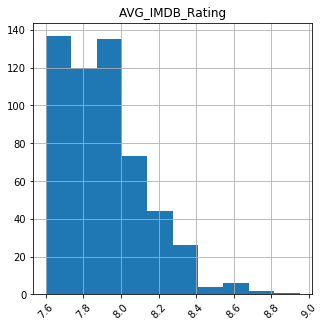

In [332]:
dat_.hist(figsize=(5,5), xrot=45)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c61a8b08>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c619d808>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c6339e88>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c61b7308>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c61b7888>],
 'means': []}

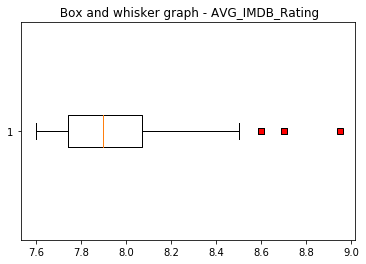

In [333]:
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title(' Box and whisker graph - AVG_IMDB_Rating')
ax5.boxplot(dat_.AVG_IMDB_Rating, vert=False, flierprops=red_square)

#### Conclusion from the graph: The distribution is positively skewed, because the whisker and half-box are longer on the right side of the median than on the left side. Exist outliers. 

In [334]:
# create a list of our conditions
conditions = [
    (dat_['AVG_IMDB_Rating'] == 0),
    (dat_['AVG_IMDB_Rating'] > 1) & (dat_['AVG_IMDB_Rating'] <=8),
    (dat_['AVG_IMDB_Rating'] > 8) 
    ]

# create a list of the values we want to assign for each condition
values = [ 'No_score','Medium_score','High_score']

# create a new column and use np.select to assign values to it using our lists as arguments
dat_['Level_of_AVG_IMDB_Rating']=dat_['Level_of_AVG_IMDB_Rating'] = np.select(conditions, values)


In [335]:
hist=dat_.groupby(['Level_of_AVG_IMDB_Rating'])['Director'].count().reset_index()
hist_=hist.sort_values("Director", axis = 0,ascending=False)
hist_

,Level_of_AVG_IMDB_Rating,Director
1,Medium_score,392
0,High_score,156


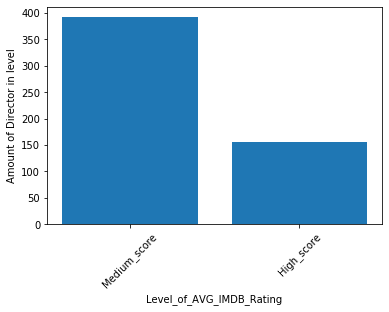

In [336]:
x = hist_['Level_of_AVG_IMDB_Rating']
y = hist_['Director']

plt.bar(x,y,align='center') 
plt.xlabel('Level_of_AVG_IMDB_Rating')
plt.ylabel('Amount of Director in level') 
plt.xticks(rotation = 45)
plt.show()

In [337]:
hist_['_%_'] = (hist_['Director'] / hist_['Director'].sum()) * 100
hist_

,Level_of_AVG_IMDB_Rating,Director,_%_
1,Medium_score,392,71.53
0,High_score,156,28.47


### Meta_score KPI - top 10  AVG  and level

#### from produced film 

In [338]:
dir_list=df.loc[:,"Director"].unique()
res = {}
for dir in dir_list:
    subset_by_dir = df[df['Director'] == dir]
    for x in subset_by_dir:
        z=round((sum(subset_by_dir['Meta_score'])/len(subset_by_dir)),2)
    res[dir]=z
dat_=pd.DataFrame(res.items(), columns=['Director', 'AVG_Meta_score']).\
                  sort_values("AVG_Meta_score", axis = 0,ascending=False).reset_index(drop=True)
dat_.head(10)

,Director,AVG_Meta_score
0,Orson Welles,99.50
1,Charles Laughton,99.00
2,Michael Curtiz,98.50
3,Guillermo del Toro,98.00
4,Sergei M. Eisenstein,97.00
5,Carol Reed,97.00
6,Sam Peckinpah,97.00
7,Jules Dassin,97.00
8,Cristian Mungiu,97.00
9,James Algar,96.00


In [339]:
dat_.describe()

,AVG_Meta_score
count,548.00
mean,62.14
std,30.09
min,0.00
25%,55.00
50%,73.00
75%,82.14
max,99.50


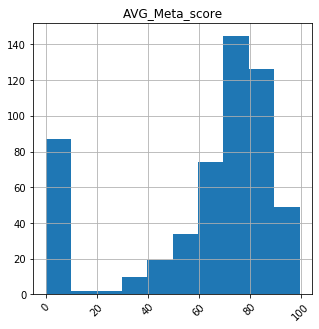

In [340]:
dat_.hist(figsize=(5,5), xrot=45)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c5f10688>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c5f15388>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c5f0b908>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c5f15e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c5f27448>],
 'means': []}

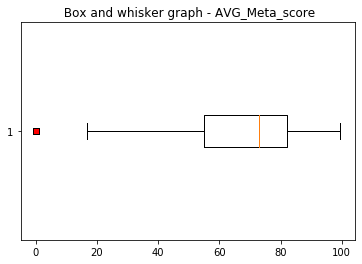

In [341]:
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title(' Box and whisker graph - AVG_Meta_score')
ax5.boxplot(dat_.AVG_Meta_score, vert=False, flierprops=red_square)

#### Conclusions:The distribution is negatively skewed, because the whisker and half-box are longer on the left side of the median than on the right side. Exist outlier. 

In [342]:
# create a list of our conditions
conditions = [
    (dat_['AVG_Meta_score'] == 0),
    (dat_['AVG_Meta_score'] > 0) & (dat_['AVG_Meta_score'] <=55),
    (dat_['AVG_Meta_score'] > 55) & (dat_['AVG_Meta_score'] <= 82),
    (dat_['AVG_Meta_score'] > 82) 
    ]

# create a list of the values we want to assign for each condition
values = ['No_score','Low_score', 'Medium_score', 'High_score']

# create a new column and use np.select to assign values to it using our lists as arguments
dat_['Level_of_Meta_score']=dat_['Level_of_Meta_score'] = np.select(conditions, values)


In [343]:
hist=dat_.groupby(['Level_of_Meta_score'])['Director'].count().reset_index()
hist_=hist.sort_values("Director", axis = 0,ascending=False)
hist_

,Level_of_Meta_score,Director
2,Medium_score,272
0,High_score,137
3,No_score,87
1,Low_score,52


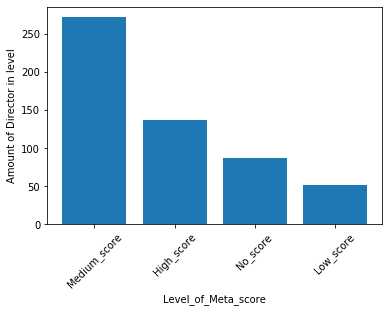

In [344]:
x = hist_['Level_of_Meta_score']
y = hist_['Director']

plt.bar(x,y,align='center') 
plt.xlabel('Level_of_Meta_score')
plt.ylabel('Amount of Director in level') 
plt.xticks(rotation = 45)
plt.show()

In [345]:
hist_['_%_'] = (hist_['Director'] / hist_['Director'].sum()) * 100
hist_

,Level_of_Meta_score,Director,_%_
2,Medium_score,272,49.64
0,High_score,137,25.00
3,No_score,87,15.88
1,Low_score,52,9.49


### Gross Level for Director KPI

#### explore and data cleaning

In [346]:
df['Gross'].describe()

count           831
unique          823
top       4,360,000
freq              5
Name: Gross, dtype: object

In [347]:
df['Gross'].isnull().sum()

169

In [348]:
df['Gross'] = df['Gross'].fillna('0')
df.Gross =df.Gross.apply(lambda x: x.replace(",",""))
df['Gross'] = df['Gross'].astype(int)

In [349]:
df['Gross'].describe()

count        1000.00
mean     56536877.98
std     103238179.48
min             0.00
25%        445709.75
50%      10702751.50
75%      61539891.25
max     936662225.00
Name: Gross, dtype: float64

In [350]:
df['Gross'].dtypes

dtype('int32')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1C5C5DF48>]],
      dtype=object)

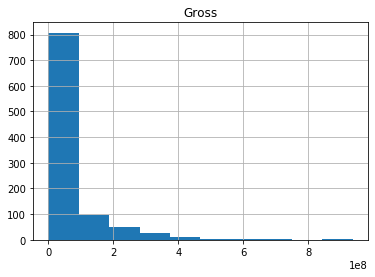

In [351]:
df.hist(column='Gross')

In [352]:
dir_list=df.loc[:,"Director"].unique()
res = {}
for dir in dir_list:
    subset_by_dir = df[df['Director'] == dir]
    for x in subset_by_dir:
        z=round((sum(subset_by_dir['Gross'])/len(subset_by_dir)),2)
    res[dir]=z
dat_=pd.DataFrame(res.items(), columns=['Director', 'AVG_Gross']).\
                  sort_values("AVG_Gross", axis = 0,ascending=False).reset_index(drop=True)
dat_.head(10)

,Director,AVG_Gross
0,Anthony Russo,551259850.75
1,Gareth Edwards,532177324.00
2,J.J. Abrams,474390301.67
3,Josh Cooley,434038008.00
4,Roger Allers,422783777.00
5,Tim Miller,363070709.00
6,James Gunn,361494850.50
7,James Cameron,349647320.40
8,Byron Howard,341268248.00
9,David Yates,326317907.00


{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c5e02488>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c5e23248>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c5e1f648>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c5e23d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c5e0e2c8>],
 'means': []}

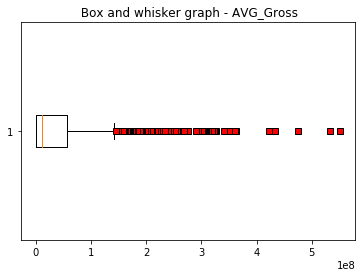

In [353]:
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title(' Box and whisker graph - AVG_Gross')
ax5.boxplot(dat_.AVG_Gross, vert=False, flierprops=red_square)

#### conclusion:The distribution is positively skewed, exist outliers.

#### categorize variable Gross

In [354]:
# create a list of our conditions
conditions = [
    (df['Gross'] == 0),
    (df['Gross'] > 0) & (df['Gross'] <=400000),
    (df['Gross'] > 400000) & (df['Gross'] <= 1000000),
    (df['Gross'] > 1000000) & (df['Gross'] <= 60000000),
    (df['Gross'] > 60000000)
    ]

# create a list of the values we want to assign for each condition
values = ['No_Gross','Low_Gross', 'Medium_Gross', 'High_Gross', 'Very_high_Gross']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Level_of_Gross']=df['Level_of_Gross'] = np.select(conditions, values)

In [355]:
df.head(2)

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross,Level_of_Gross
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.30,80.00,2343110,28341469,High_Gross
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.20,100.00,1620367,134966411,Very_high_Gross


#### Distribution  Gross Level 

In [356]:
hist=df.groupby(['Level_of_Gross'])['Director'].count().reset_index()
hist_=hist.sort_values("Director", axis = 0,ascending=False)
hist_

,Level_of_Gross,Director
0,High_Gross,461
4,Very_high_Gross,253
3,No_Gross,169
1,Low_Gross,78
2,Medium_Gross,39


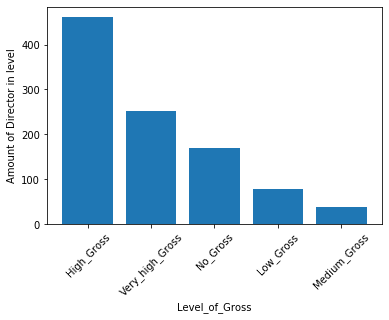

In [357]:
x = hist_['Level_of_Gross']
y = hist_['Director']

plt.bar(x,y,align='center') 
plt.xlabel('Level_of_Gross')
plt.ylabel('Amount of Director in level') 
plt.xticks(rotation = 45)
plt.show()

In [358]:
hist_['_%_'] = (hist_['Director'] / hist_['Director'].sum()) * 100
hist_

,Level_of_Gross,Director,_%_
0,High_Gross,461,46.10
4,Very_high_Gross,253,25.30
3,No_Gross,169,16.90
1,Low_Gross,78,7.80
2,Medium_Gross,39,3.90


#### conclusion:  46 percent of directors make films with hight level of Gross

## 4. Analyze the dataset and write 2 insights - please present the data analysis
## next to each insight

#### 4.1 YEAR and other insights 


In [359]:
df.Released_Year.nunique()

99

In [360]:
df.Released_Year.describe()

count   1000.00
mean    1991.22
std       23.29
min     1920.00
25%     1976.00
50%     1999.00
75%     2009.00
max     2020.00
Name: Released_Year, dtype: float64

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie_Name      1000 non-null   object 
 1   Released_Year   1000 non-null   int64  
 2   Genre           1000 non-null   object 
 3   Director        1000 non-null   object 
 4   Star1           1000 non-null   object 
 5   Star2           1000 non-null   object 
 6   Star3           1000 non-null   object 
 7   Star4           1000 non-null   object 
 8   Runtime (min)   1000 non-null   int64  
 9   IMDB_Rating     1000 non-null   float64
 10  Meta_score      1000 non-null   float64
 11  No_of_Votes     1000 non-null   int64  
 12  Gross           1000 non-null   int32  
 13  Level_of_Gross  1000 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(8)
memory usage: 105.6+ KB


In [362]:
df['Released_Year'] = pd.to_datetime(df.Released_Year, format='%Y')

#### Top 5 years with the most films produced

In [363]:
df.groupby(['Released_Year']).size().nlargest(5).reset_index(name='count_of_film')

,Released_Year,count_of_film
0,2014-01-01,32
1,2004-01-01,31
2,2009-01-01,29
3,2013-01-01,28
4,2016-01-01,28


In [364]:
df.head(2)

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross,Level_of_Gross
0,The Shawshank Redemption,1994-01-01,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.30,80.00,2343110,28341469,High_Gross
1,The Godfather,1972-01-01,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.20,100.00,1620367,134966411,Very_high_Gross


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1C6274588>]],
      dtype=object)

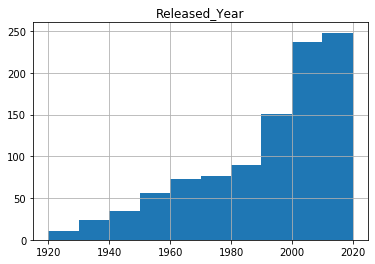

In [365]:
df.hist(column='Released_Year')

In [366]:
df['Released_Year'] = df['Released_Year'].dt.strftime('%Y')

In [367]:
df.head(2)

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross,Level_of_Gross
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.30,80.00,2343110,28341469,High_Gross
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.20,100.00,1620367,134966411,Very_high_Gross


####  In what years did the top 5 most popular movies according IMDB ?

In [368]:
df_year=df[["Movie_Name","IMDB_Rating","Released_Year"]]
df_year_sort=df_year.sort_values("IMDB_Rating", axis = 0,ascending=False).head(5)
df_year_sort

,Movie_Name,IMDB_Rating,Released_Year
0,The Shawshank Redemption,9.30,1994
1,The Godfather,9.20,1972
2,The Dark Knight,9.00,2008
3,The Godfather: Part II,9.00,1974
4,12 Angry Men,9.00,1957


#### How many films were made betweeen 2000 and 2020 years ?

In [369]:
time_slice=df.loc[(df['Released_Year'] >= '2000') & (df['Released_Year'] <='2020')] 

In [370]:
len(time_slice)

485

#### What 5 years were the most profitable ? 

In [371]:
df.groupby(['Released_Year'])['Gross'].sum().nlargest(5).reset_index(name='sum_of_Gross')

,Released_Year,sum_of_Gross
0,2009,2937170585.00
1,2014,2755629221.00
2,2018,2607757362.00
3,2016,2595557425.00
4,2012,2542616037.00


#### Correlation Between All Features - measures the strength and direction of a linear relationship between two variables

In [373]:
df.corr() # result always has a value between −1 and 1

,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross
Runtime (min),1.00,0.24,-0.05,0.17,0.14
IMDB_Rating,0.24,1.00,-0.04,0.49,0.08
Meta_score,-0.05,-0.04,1.00,0.25,0.19
No_of_Votes,0.17,0.49,0.25,1.00,0.60
Gross,0.14,0.08,0.19,0.60,1.00


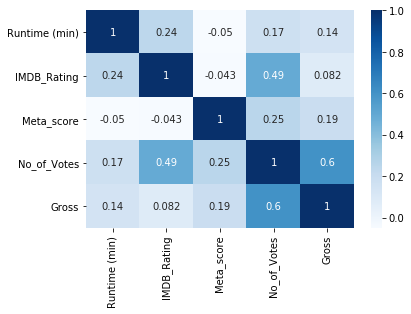

In [374]:
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

#### conlusion: No_of_Votes and IMDB_Rating have strong positive correlation, No_of_Votes and Meta_score have medium positive correlation, Gross and No_of_Votes have strong positive correlation, otpairs have small correlation. 

#### How many  films have the most popular genre ? 

In [375]:
df["Genre_drama_IN"]=(df["Genre"].str.lower().str.contains("drama", regex=False,na=False).astype(int))

In [376]:
df.head(2)

,Movie_Name,Released_Year,Genre,Director,Star1,Star2,Star3,Star4,Runtime (min),IMDB_Rating,Meta_score,No_of_Votes,Gross,Level_of_Gross,Genre_drama_IN
0,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,142,9.30,80.00,2343110,28341469,High_Gross,1
1,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,175,9.20,100.00,1620367,134966411,Very_high_Gross,1


In [377]:
drama_=df.groupby(['Genre_drama_IN']).size().reset_index(name='count_film').astype('int')
drama_

,Genre_drama_IN,count_film
0,0,276
1,1,724


### 3.Create a mock dashboard for helping the film producer to pick a director

#### Please see additional files